# Module 4 Homework

In this homework, we will use the lead scoring dataset Bank Marketing dataset.

In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

In [1]:
import pandas as pd

### Data preparation

- Check if the missing values are presented in the features.
- If there are missing values:
    - For caterogiral features, replace them with 'NA'
    - For numerical features, replace with with 0.0



In [2]:
df = pd.read_csv('data/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
df[['lead_source', 'industry', 'employment_status', 'location']] = df[['lead_source', 'industry', 'employment_status', 'location']].fillna('NA')
df['annual_income'] = df['annual_income'].fillna(0.0)

In [6]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
print(len(df_train), len(df_val), len(df_test))
print(len(df_train)+len(df_val)+len(df_test), len(df))

876 293 293
1462 1462


In [11]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [13]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

**Which numerical variable (among the following 4) has the highest AUC?**

- lead_score
- **number_of_courses_viewed**
- interaction_count
- annual_income

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
df_train[numerical]

,number_of_courses_viewed,annual_income,interaction_count,lead_score
0,2,95543.0,3,0.78
1,1,54924.0,6,0.39
2,2,77352.0,2,0.22
3,2,34600.0,2,0.31
4,0,43615.0,2,0.01
...,...,...,...,...
871,5,67314.0,2,0.87
872,6,63996.0,4,0.92
873,1,73702.0,2,0.55
874,1,93341.0,4,0.99


In [16]:
auc_scores = {}

for i in numerical:
    score = roc_auc_score(y_train, df_train[i])
    auc_scores[i] = score

highest = 0
for k, v in auc_scores.items():
    print(k, v)
    if v > highest:
        highest = v
        variable = k

print("\n")
print(f"{variable}: {highest}")


number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176


number_of_courses_viewed: 0.7635680590007088


### Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

*What's the AUC of this model on the validation dataset? (round to 3 digits)*

- 0.32
- 0.52
- 0.72
- 0.92

In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
import numpy as np

np.random.seed(1)

In [19]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
#model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000, random_state=1)
#model = LogisticRegression()

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
y_pred = model.predict_proba(X_val)[:, 1]

In [23]:
converted_decision = (y_pred >= 0.5)

In [24]:
round((y_val == converted_decision).mean(), 2)

0.7

In [25]:
round(roc_auc_score(y_val, y_pred), 3)

0.817

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

*At which threshold precision and recall curves intersect?*

- 0.145
- 0.345
- 0.545
- 0.745

In [26]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [27]:
precision_scores = []
recall_scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    precision_scores.append(p)
    r = tp / (tp + fn)
    recall_scores.append(r)

/var/folders/_n/dkpq24553tld3h_fkb22k7jw0000gn/T/ipykernel_14618/2991668961.py:17: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [28]:
import matplotlib.pyplot as plt

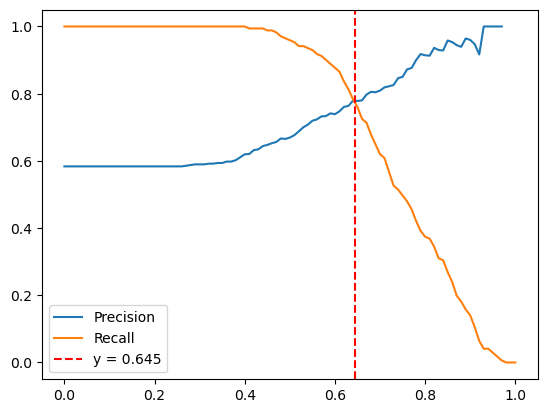

In [29]:
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label = "Recall")
plt.axvline(x=0.645, color='red', linestyle='--', label='y = 0.645')

plt.legend()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [30]:
precision_scores = []
recall_scores = []
f1_scores = []
f1_max = 0

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = t
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp) if (tp + fp) > 0 else 0
    precision_scores.append(p)
    r = tp / (tp + fn) if (tp + fn) > 0 else 0
    recall_scores.append(r)
    f1 = 2 * ((p*r) / (p+r)) if (p+r) > 0 else 0
    f1_scores.append(f1)
    if f1_max < f1:
        f1_max = f1
        max_threshold = t

In [31]:
f1_max, max_threshold

(0.8124999999999999, 0.5700000000000001)

In [32]:
from sklearn.metrics import f1_score

In [33]:
precision_scores = []
recall_scores = []
f1_scores = []
f1_max = 0

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    t = t
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp) if (tp + fp) > 0 else 0
    precision_scores.append(p)
    r = tp / (tp + fn) if (tp + fn) > 0 else 0
    recall_scores.append(r)
    #f1 = 2 * ((p*r) / (p+r))
    f1 = f1_score(y_val, predict_positive)
    f1_scores.append(f1)
    if f1_max < f1:
        f1_max = f1
        max_threshold = t

In [34]:
f1_max, max_threshold

(0.8125, 0.5700000000000001)

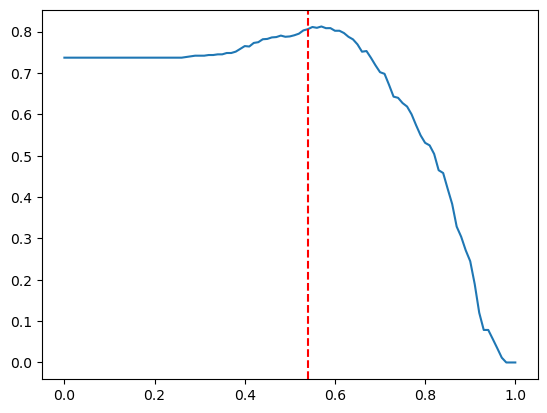

In [35]:
plt.plot(thresholds, f1_scores)
plt.axvline(x=0.54, color='red', linestyle='--', label='y = 0.54')



### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

In [36]:
from sklearn.model_selection import KFold

In [37]:
import numpy as np

In [38]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    #model = LogisticRegression(solver='lbfgs', C=C, max_iter=10000, random_state=1)
    #model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [39]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [40]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [41]:
scores

[0.8060745924216483,
 0.8713738368910783,
 0.7754320118852139,
 0.8018368617683685,
 0.8558272713202291]

In [42]:
print((np.mean(scores), round(np.std(scores), 4)))

(0.8221089148573075, 0.0358)


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [43]:
C_values = [0.000001, 0.001, 1]
results = []

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
    auc_scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    mean_auc = np.mean(scores)
    std_auc = np.std(scores)
    results.append((C, round(mean_auc, 4), round(std_auc, 4)))

results


[(1e-06, 0.6912, 0.1344), (0.001, 0.7497, 0.1385), (1, 0.7678, 0.1253)]